In [1]:
#the goal is to plot correlations and run the models to get some ideas
#also try for monte carlo simulation
#try for moran's I statistic
#plot more vizs

In [2]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
import statsmodels.api as sm;
from sklearn.cluster import KMeans

In [99]:
data = pd.read_csv('MappedDataset.csv')

In [4]:
data['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

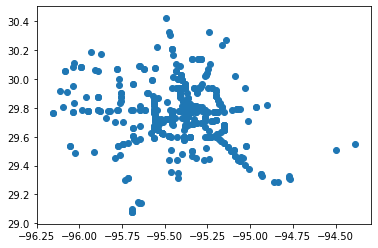

In [5]:
plt.scatter(data['LONGITUDE_IB_CW'],data['LATITUDE_IB_CW'])
plt.show()

In [5]:
data.head()

,ROADWAY_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TOTAL_MINUTES,ENTER_DATE,ENTER_TIME,CLEAR_DATE,CLEAR_TIME,elev_meters,Rain_Totals_mm,Rain_Dist_meters,Highway_Inc_Length_m,Rain_Dist_miles,Rain_Totals_meters
0,BELTWAY 8-EAST,29.8085,29.8089,-95.1639,-95.1628,Harris,0,8/26/2017,3:56,8/26/2017,3:56,10.10,37.44,550.454556,115.211774,0.342037,0.03744
1,BELTWAY 8-EAST,29.6656,29.6656,-95.1558,-95.1556,Harris,357,8/26/2017,8:06,8/26/2017,14:03,8.88,39.75,2892.704125,19.361625,1.797443,0.03975
2,BELTWAY 8-EAST,29.8830,29.8830,-95.1984,-95.1984,Harris,4745,8/27/2017,1:50,8/30/2017,8:55,14.32,8.25,3149.513177,0.000000,1.957017,0.00825
3,BELTWAY 8-EAST,29.8830,29.8830,-95.1984,-95.1984,Harris,4351,8/27/2017,8:49,8/30/2017,9:20,14.32,8.25,3149.513177,0.000000,1.957017,0.00825
4,BELTWAY 8-EAST,29.6498,29.6498,-95.1562,-95.1561,Harris,4138,8/27/2017,11:55,8/30/2017,8:53,9.61,39.75,1241.143782,9.682325,0.771211,0.03975


In [6]:
x = data[['LONGITUDE_IB_CW','LATITUDE_IB_CW']]
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3, 0, 2, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       3, 1, 1, 0, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,

Text(0.5, 1.0, 'K-means Clustering Plot - Based on Location of Incidents')

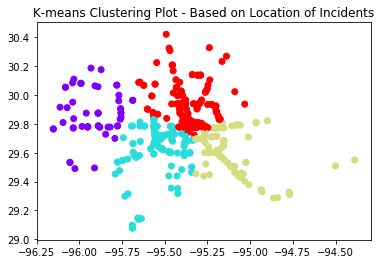

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['LONGITUDE_IB_CW'],data_with_clusters['LATITUDE_IB_CW'],c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title("K-means Clustering Plot - Based on Location of Incidents")



Text(0.5, 0, 'Features')

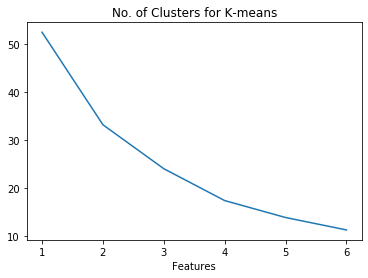

In [10]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title("No. of Clusters for K-means")
plt.xlabel("Features")

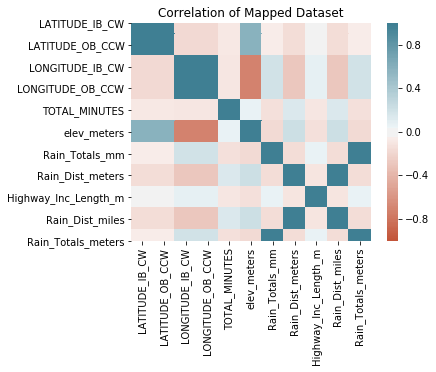

In [11]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation of Mapped Dataset")
plt.show()

In [12]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [13]:
data['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

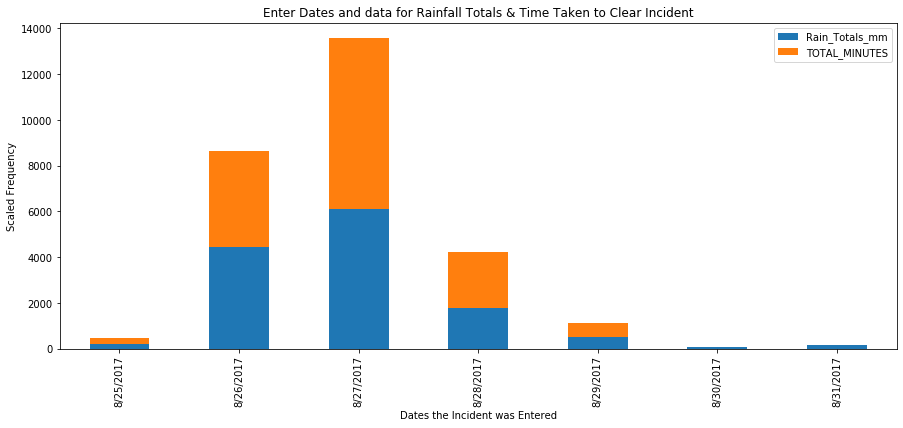

In [14]:
aggDf1=data.groupby('ENTER_DATE').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf1['TOTAL_MINUTES'] = aggDf1['TOTAL_MINUTES']/100;

aggDf1.plot(x='ENTER_DATE', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.title("Enter Dates and data for Rainfall Totals & Time Taken to Clear Incident")
plt.xlabel("Dates the Incident was Entered")
plt.ylabel("Scaled Frequency")
plt.show()

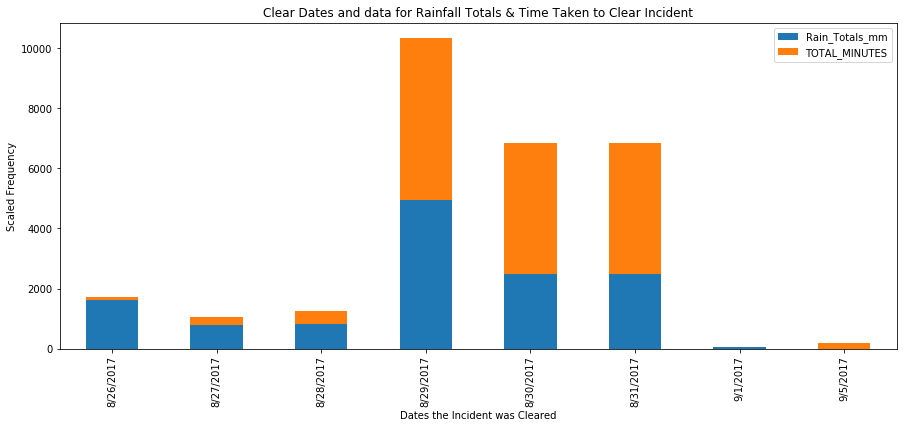

In [15]:
aggDf2=data.groupby('CLEAR_DATE').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf2['TOTAL_MINUTES'] = aggDf2['TOTAL_MINUTES']/100;

aggDf2.plot(x='CLEAR_DATE', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.xlabel("Dates the Incident was Cleared")
plt.ylabel("Scaled Frequency")
plt.title("Clear Dates and data for Rainfall Totals & Time Taken to Clear Incident")
plt.show()

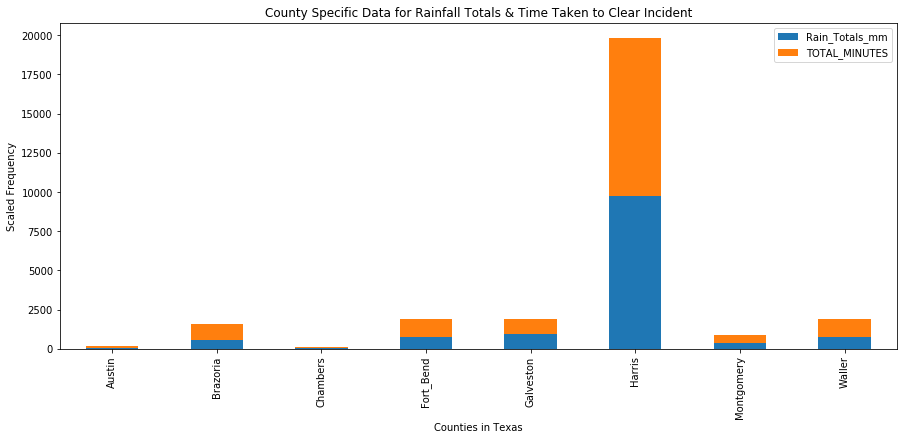

In [16]:
aggDf3=data.groupby('COUNTY_NAME').agg({"Rain_Totals_mm":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']

aggDf3['TOTAL_MINUTES'] = aggDf3['TOTAL_MINUTES']/100;

aggDf3.plot(x='COUNTY_NAME', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
plt.xlabel("Counties in Texas")
plt.ylabel("Scaled Frequency")
plt.title("County Specific Data for Rainfall Totals & Time Taken to Clear Incident")
plt.show()

In [17]:
aggDf4=data.groupby('ROADWAY_NAME').agg({"Highway_Inc_Length_m":"sum", "TOTAL_MINUTES":"sum"}).reset_index()#.sum()['TOTAL_MINUTES']
#print(aggDf4)
#aggDf4['TOTAL_MINUTES'] = aggDf4['TOTAL_MINUTES']/100;
selectedAgg = aggDf4
#selectedAgg.drop(selectedAgg.index[selectedAgg['ROADWAY_NAME'] != ])
#dff.drop(dff.index[df['COUNTY_NAME'] != 'Harris'], inplace=True)
#aggDf4.plot(x='COUNTY_NAME', y = ['Rain_Totals_mm', 'TOTAL_MINUTES'] , kind='bar', stacked=True, figsize=(15,6))
#plt.xlabel = "Counties in Texas"
#plt.title("County Specific Data for Rainfall Totals & Time Taken to Clear Incident")
#plt.show()

In [18]:
#grab the names of highways that have a incident count higher than the hard coded limit of incidents
highways = data.groupby(["ROADWAY_NAME"])["TOTAL_MINUTES"].count()
highways = highways.sort_values()
highways = highways[highways > 9]

highwaynames = highways.index
print(highwaynames)
print(len(highwaynames))

Index(['IH-610 NORTH LOOP', 'IH-69', 'IH-10', 'IH-69 SOUTHWEST',
       'IH-69 Eastex Freeway', 'IH-10 KATY', 'IH-45 GULF', 'BELTWAY 8-NORTH',
       'IH-45', 'SH-288', 'HARDY TOLL ROAD', 'IH-45 NORTH', 'IH-10 EAST',
       'SHT'],
      dtype='object', name='ROADWAY_NAME')
14


In [19]:
selectedAgg = selectedAgg[selectedAgg['ROADWAY_NAME'].isin(highwaynames)]

In [18]:
selectedAgg['TOTAL_MINUTES'] = selectedAgg['TOTAL_MINUTES']/100
print(selectedAgg)

            ROADWAY_NAME  Highway_Inc_Length_m  TOTAL_MINUTES
1        BELTWAY 8-NORTH            493.531919         524.76
28       HARDY TOLL ROAD              0.000000         733.71
29                 IH-10              0.000000         492.93
30            IH-10 EAST            354.131554         622.91
31            IH-10 KATY            202.282588         621.28
32                 IH-45            257.351632         375.76
33            IH-45 GULF            270.423175         485.19
34           IH-45 NORTH             71.037584         523.54
36     IH-610 NORTH LOOP            343.632742         303.08
39                 IH-69             33.681608         368.78
40  IH-69 Eastex Freeway             26.783942         459.18
41       IH-69 SOUTHWEST            405.336541         364.54
49                SH-288            150.127671         535.00
58                   SHT           1514.052126        1907.31


/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


                  Roadways and Time Taken to Clear Incident & Highways Length Blocked


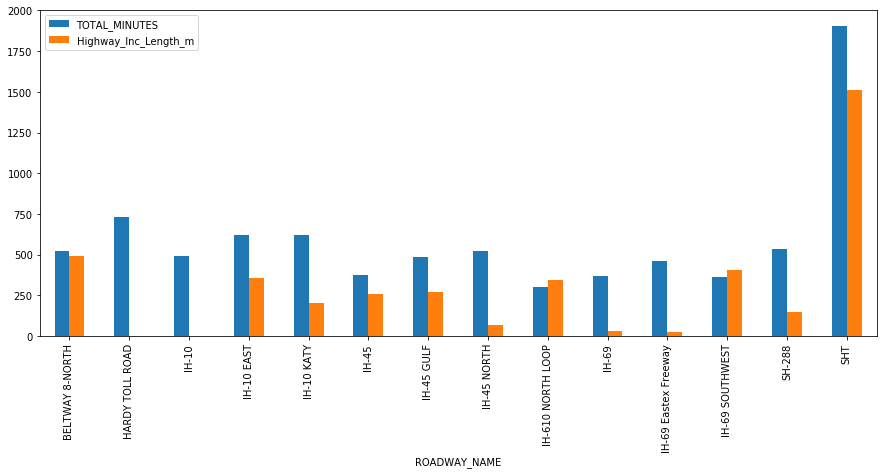

In [31]:
selectedAgg.plot(x='ROADWAY_NAME', y = ['TOTAL_MINUTES', 'Highway_Inc_Length_m'] , kind='bar', figsize=(15, 6))
#plt.xlabel("Roadways in Texas")
#plt.ylabel("Scaled Frequency")
#plt.title("Roadways and Time Taken to Clear Incident & Highways Length Blocked")
print("                  Roadways and Time Taken to Clear Incident & Highways Length Blocked")
plt.show()

In [20]:
data.columns

Index(['ROADWAY_NAME', 'LATITUDE_IB_CW', 'LATITUDE_OB_CCW', 'LONGITUDE_IB_CW',
       'LONGITUDE_OB_CCW', 'COUNTY_NAME', 'TOTAL_MINUTES', 'ENTER_DATE',
       'ENTER_TIME', 'CLEAR_DATE', 'CLEAR_TIME', 'elev_meters',
       'Rain_Totals_mm', 'Rain_Dist_meters', 'Highway_Inc_Length_m',
       'Rain_Dist_miles', 'Rain_Totals_meters'],
      dtype='object')

In [104]:
#check if the total minutes is less than 1
data[data['TOTAL_MINUTES'] < 1]

,ROADWAY_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TOTAL_MINUTES,ENTER_DATE,ENTER_TIME,CLEAR_DATE,CLEAR_TIME,elev_meters,Rain_Totals_mm,Rain_Dist_meters,Highway_Inc_Length_m,Rain_Dist_miles,Rain_Totals_meters


In [103]:
data.shape

(468, 17)

In [106]:
data['Highway_Inc_Length_m'] = data['Highway_Inc_Length_m'].astype(int)

In [107]:
data[data['Highway_Inc_Length_m'] < 1]

,ROADWAY_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TOTAL_MINUTES,ENTER_DATE,ENTER_TIME,CLEAR_DATE,CLEAR_TIME,elev_meters,Rain_Totals_mm,Rain_Dist_meters,Highway_Inc_Length_m,Rain_Dist_miles,Rain_Totals_meters
57,FM-1488,30.224398,30.224391,-95.547428,-95.547428,Montgomery,5344,8/27/2017,15:23,8/31/2017,8:27,59.92,3.76,4837.072434,0,3.005617,0.00376
122,IH-10 EAST,29.792342,29.792340,-95.079678,-95.079678,Harris,122,8/26/2017,5:04,8/26/2017,7:06,1.12,45.10,3845.178224,0,2.389283,0.04510
123,IH-10 EAST,29.792342,29.792340,-95.079678,-95.079678,Harris,118,8/26/2017,5:08,8/26/2017,7:06,1.12,45.10,3845.178224,0,2.389283,0.04510
128,IH-10 EAST,29.792342,29.792340,-95.079678,-95.079678,Harris,7138,8/26/2017,11:43,8/31/2017,10:41,1.12,45.10,3845.178224,0,2.389283,0.04510
131,IH-10 EAST,29.792342,29.792340,-95.079678,-95.079678,Harris,6530,8/26/2017,21:53,8/31/2017,10:43,1.12,45.10,3845.178224,0,2.389283,0.04510
194,IH-45 NORTH,29.789952,29.789958,-95.371808,-95.371808,Harris,504,8/26/2017,7:04,8/26/2017,15:28,9.92,34.00,418.303918,0,0.259922,0.03400
195,IH-45 NORTH,29.789952,29.789958,-95.371808,-95.371808,Harris,422,8/26/2017,7:56,8/26/2017,14:58,9.92,34.00,418.303918,0,0.259922,0.03400
198,IH-45 NORTH,29.789952,29.789958,-95.371808,-95.371808,Harris,4167,8/26/2017,22:34,8/29/2017,20:01,9.92,34.00,418.303918,0,0.259922,0.03400
203,IH-45 NORTH,29.789952,29.789958,-95.371808,-95.371808,Harris,4124,8/26/2017,23:34,8/29/2017,20:18,9.92,34.00,418.303918,0,0.259922,0.03400
246,IH-69,29.494314,29.494311,-95.911601,-95.911601,Fort_Bend,6988,8/25/2017,22:22,8/30/2017,18:50,32.25,30.34,17497.038192,0,10.872155,0.03034


In [108]:
#replace the values less than 1
data['Highway_Inc_Length_m'].replace({0: 1}, inplace=True)
data['TOTAL_MINUTES'].replace({0: 1}, inplace=True)
data['TOTAL_MINUTES'].replace({-1: 1}, inplace=True)

In [109]:
data.shape

(468, 17)

In [110]:
data['Ratio_dur_len'] = (data['TOTAL_MINUTES']/data['Highway_Inc_Length_m']).astype(int)

In [70]:
from sklearn.model_selection import train_test_split

X=data[['elev_meters', 'Rain_Dist_meters', 'TOTAL_MINUTES', 'Rain_Totals_meters', 'Highway_Inc_Length_m']]  # Features
y=data['Ratio_dur_len']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Random Forest: Target Variable - Ratio_dur_len; Predictor Variables \n - Elev_meters, Rain_Totals_meters, Rain_Dist_meters, Highway_Inc_Length_m")


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("MSE: " , (metrics.mean_squared_error(y_test, y_pred))/60)
print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
print("R2: " , metrics.r2_score(y_test, y_pred))
print("Max Error: " , metrics.max_error(y_test, y_pred))
print("Explained Var: " , metrics.explained_variance_score(y_test, y_pred))

Random Forest: Target Variable - Ratio_dur_len; Predictor Variables 
 - Elev_meters, Rain_Totals_meters, Rain_Dist_meters, Highway_Inc_Length_m
MSE:  16605.96134751773
MAE:  444.3191489361702
R2:  0.790481855274514
Max Error:  4892
Explained Var:  0.7936478526727342


In [71]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['elev_meters', 'Rain_Dist_meters', 'TOTAL_MINUTES', 'Rain_Totals_meters', 'Highway_Inc_Length_m']).sort_values(ascending=False)
feature_imp

TOTAL_MINUTES           0.307232
elev_meters             0.208853
Rain_Dist_meters        0.202279
Rain_Totals_meters      0.182665
Highway_Inc_Length_m    0.098971
dtype: float64

No handles with labels found to put in legend.


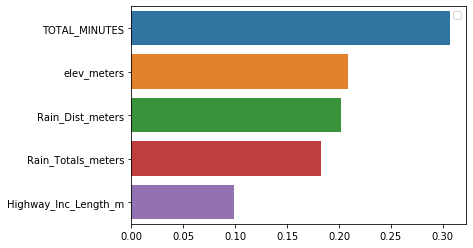

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel = 'Feature Importance Score'
plt.ylabel= 'Features'
plt.title = "Visualizing Important Features" 
plt.legend()
plt.show()

In [111]:
def RunRandomForest(data, predictors, target):
    ########## Import train_test_split function
    from sklearn.model_selection import train_test_split
    # Split dataset into features and labels
    X=data[predictors]  # Removed feature "sepal length"
    y=data[target]                                       
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

    from sklearn.ensemble import RandomForestClassifier
    ######### Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    ######### Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    ######### prediction on test set
    y_pred=clf.predict(X_test)

    #print("Random Forest: Target Variable - TOTAL_MINUTES; Predictor Variables - \n", predictors)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    print("MSE: " , (metrics.mean_squared_error(y_test, y_pred))/60)
    print("MAE: " , metrics.mean_absolute_error(y_test, y_pred))
    print("R2: " , metrics.r2_score(y_test, y_pred))
    print("Max Error: " , metrics.max_error(y_test, y_pred))
    print("Explained Var: " , metrics.explained_variance_score(y_test, y_pred))

In [113]:
def RunModels(data, predictors, target):
    print("TARGET VARIABLE - ", target)
    print("PREDICTOR VARIABLES - ", predictors)
    print("Random Forest - ")
    RunRandomForest(data, predictors, target)
    print("")

In [89]:
predictors = ['TOTAL_MINUTES', 'Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

predictors = ['Rain_Dist_meters', 'Rain_Totals_meters']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'elev_meters']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

predictors = ['TOTAL_MINUTES', 'elev_meters']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

TARGET VARIABLE -  Highway_Inc_Length_m
PREDICTOR VARIABLES -  ['TOTAL_MINUTES', 'Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters']
Random Forest - 
MSE:  32.74021406727829
MAE:  12.021406727828746
R2:  -0.05964848312399984
Max Error:  687
Explained Var:  -0.03124124401344175

TARGET VARIABLE -  Highway_Inc_Length_m
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters']
Random Forest - 
MSE:  30.086493374108052
MAE:  10.62691131498471
R2:  0.02624011556915995
Max Error:  669
Explained Var:  0.05341600903304278

TARGET VARIABLE -  Highway_Inc_Length_m
PREDICTOR VARIABLES -  ['Rain_Dist_meters', 'Rain_Totals_meters']
Random Forest - 
MSE:  30.400713557594294
MAE:  11.113149847094801
R2:  0.016070269394241055
Max Error:  669
Explained Var:  0.037270533561891805

TARGET VARIABLE -  Highway_Inc_Length_m
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'elev_meters']
Random Forest - 
MSE:  33.27543323139653
MAE:  12.15290519877676
R2:  -0.0769710386281075
Max Err

In [90]:
predictors = ['TOTAL_MINUTES', 'Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters', 'Highway_Inc_Length_m']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters', 'Highway_Inc_Length_m']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

predictors = ['Rain_Dist_meters', 'Rain_Totals_meters', 'Highway_Inc_Length_m']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'elev_meters', 'Highway_Inc_Length_m']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

predictors = ['TOTAL_MINUTES', 'elev_meters', 'Highway_Inc_Length_m']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

TARGET VARIABLE -  Ratio_dur_len
PREDICTOR VARIABLES -  ['TOTAL_MINUTES', 'Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters', 'Highway_Inc_Length_m']
Random Forest - 
MSE:  30074.377319062183
MAE:  644.5168195718654
R2:  0.6078827104632676
Max Error:  6547
Explained Var:  0.6087934061463662

TARGET VARIABLE -  Ratio_dur_len
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'Rain_Dist_meters', 'elev_meters', 'Highway_Inc_Length_m']
Random Forest - 
MSE:  67350.71656472987
MAE:  1237.1467889908256
R2:  0.12186443138826342
Max Error:  7020
Explained Var:  0.1287606208501766

TARGET VARIABLE -  Ratio_dur_len
PREDICTOR VARIABLES -  ['Rain_Dist_meters', 'Rain_Totals_meters', 'Highway_Inc_Length_m']
Random Forest - 
MSE:  56071.277573904175
MAE:  1083.4311926605506
R2:  0.26892859160860294
Max Error:  6355
Explained Var:  0.2742343369130863

TARGET VARIABLE -  Ratio_dur_len
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'elev_meters', 'Highway_Inc_Length_m']
Random Forest - 
MSE:  53618.83766

In [114]:
predictors = ['Rain_Totals_meters', 'elev_meters']
target = 'Ratio_dur_len'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'elev_meters', 'TOTAL_MINUTES']
target = 'Highway_Inc_Length_m'
RunModels(data, predictors, target)

predictors = ['Rain_Totals_meters', 'elev_meters', 'Highway_Inc_Length_m']
target = 'TOTAL_MINUTES'
RunModels(data, predictors, target)

TARGET VARIABLE -  Ratio_dur_len
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'elev_meters']
Random Forest - 
MSE:  110033.42184959349
MAE:  1753.621951219512
R2:  -0.4396387288764767
Max Error:  6740
Explained Var:  -0.41774708428427254

TARGET VARIABLE -  Highway_Inc_Length_m
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'elev_meters', 'TOTAL_MINUTES']
Random Forest - 
MSE:  32.78160569105691
MAE:  12.518292682926829
R2:  -0.06304434744538767
Max Error:  687
Explained Var:  -0.03674564854109086

TARGET VARIABLE -  TOTAL_MINUTES
PREDICTOR VARIABLES -  ['Rain_Totals_meters', 'elev_meters', 'Highway_Inc_Length_m']
Random Forest - 
MSE:  95122.26783536586
MAE:  1744.8262195121952
R2:  -0.7087910970499254
Max Error:  7161
Explained Var:  -0.6201086221388867

